Kunskapskontroll 3
# Notera att många av mina kommentarer i koden är till för att jag själv ska förstå.

Steg 1 - Läsa in datan

In [2]:
import pandas as pd

df = pd.read_csv("housing.csv") # Läser in CSV-filen

df.head() # Visar de första 5 radern

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.shape # Visar antal rader och kolumner

(20640, 10)

In [3]:
df.info() # Visar kolumnnamn och datatyper

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.columns # Skriver ut alla kolumnnamn

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Resultat från steg 1 - Varje rad i datasetet representerar ett geografiskt område och inte ett enskilt hus. De flesta variabler är aggregerade mått, exempelvis medianvärden eller totaler för området.
Kolumnen total_bedrooms innehåller ett mindre antal saknade värden. Andelen är relativt låg, men detta ska jag beaktas vid analyser där variabeln används.
Jag har verfierat platsdatana och området verkar ligga i USA och i delstaten Kalifornien. 

Steg 2 - Datakvalitet 
Jag kollar om det finns data som saknas eller annat som är felaktigt, orimligt eller dubbletter

In [4]:
df.isna().sum() # Kontrollerar antal saknade värden per kolumn

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
(df.isna().mean() * 100).round(2) # Visar andel saknade värden i %

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [6]:
df.duplicated().sum() # finns det dubbletter?

np.int64(0)

In [4]:
#df.describe() # Visar statistisk 
#df.describe().round(2) # Visar statistisk och avrunda för bättre läsbarhet
df.describe().style.format("{:,.0f}") # Visar statistik med färre decimaler för bättre läsbarhet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640","20,640","20,640","20,640","20,433","20,640","20,640","20,640","20,640"
mean,-120,36,29,"2,636",538,"1,425",500,4,"206,856"
std,2,2,13,"2,182",421,"1,132",382,2,"115,396"
min,-124,33,1,2,1,3,1,0,"14,999"
25%,-122,34,18,"1,448",296,787,280,3,"119,600"
50%,-118,34,29,"2,127",435,"1,166",409,4,"179,700"
75%,-118,38,37,"3,148",647,"1,725",605,5,"264,725"
max,-114,42,52,"39,320","6,445","35,682","6,082",15,"500,001"


In [8]:
df.nunique() # Unika värden per kolumn

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

Resultat av steg 2 - I detta steg har jag kontrollerat datan genom att undersöka saknade värden, dubbletter och grundläggande statistik.  Som jag redan noterade i steg 1 så saknas det värden i kolumn "total_bedrooms", 207 st.
Jag hittar inga dubletter
Högsta nummer för housing_median_age är 52. Det är förmodligen kapat vid 52.
Medianlönen och medllvärdet på hus är i USD, inte SEK

Steg 3 - Ta fram statistik, förstå priser och skillnader etc

In [5]:
# Sammanfattande statistik för numeriska kolumner, kör med tusenavgränsare, tar bort decinaler om det inte behövs
(
    df.describe()
      .round(0)
      .style.format("{:,.0f}")
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640","20,640","20,640","20,640","20,433","20,640","20,640","20,640","20,640"
mean,-120,36,29,"2,636",538,"1,425",500,4,"206,856"
std,2,2,13,"2,182",421,"1,132",382,2,"115,396"
min,-124,33,1,2,1,3,1,0,"14,999"
25%,-122,34,18,"1,448",296,787,280,3,"119,600"
50%,-118,34,29,"2,127",435,"1,166",409,4,"179,700"
75%,-118,38,37,"3,148",647,"1,725",605,5,"264,725"
max,-114,42,52,"39,320","6,445","35,682","6,082",15,"500,001"


In [6]:
# Statistik för pris (median_house_value)

(
    df["median_house_value"]
      .describe()
      .round(0)
      .to_frame()
      .style.format("{:,.0f}")
)


,median_house_value
count,"20,640"
mean,"206,856"
std,"115,396"
min,"14,999"
25%,"119,600"
50%,"179,700"
75%,"264,725"
max,"500,001"


In [15]:
# Jämförelse mellan medelvärde och median för bostadspris
mean_price = df["median_house_value"].mean()
median_price = df["median_house_value"].median()

mean_price, median_price

(np.float64(206855.81690891474), 179700.0)

In [16]:
# Sammanfattande statistik för median_income
# Samband mellan pris och inkomst 
df["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [ ]:
# Vi saknar boarea så istället skapar jag en ny kolumn som heter  "price_per_household".  
df["price_per_household"] = df["median_house_value"] / df["households"]

# Visar statistik för "price_per_household"
df["price_per_household"].describe.()



count     20640.000000
mean        809.734297
std        4451.787312
min          10.014154
25%         250.901889
50%         431.332563
75%         744.739846
max      500001.000000
Name: price_per_household, dtype: float64

In [20]:
# 5 områden med lägst bostadspris
df.nsmallest(5, "median_house_value")[
    ["median_house_value", "median_income", "households", "ocean_proximity"]
]

,median_house_value,median_income,households,ocean_proximity
2521,14999.0,1.6607,38.0,INLAND
2799,14999.0,2.1000,164.0,INLAND
9188,14999.0,4.1932,225.0,INLAND
19802,14999.0,0.5360,8.0,INLAND
5887,17500.0,2.3667,138.0,<1H OCEAN


In [21]:
# 5 områden med högst bostadspris
df.nlargest(5, "median_house_value")[
    ["median_house_value", "median_income", "households", "ocean_proximity"]
]

,median_house_value,median_income,households,ocean_proximity
89,500001.0,1.2434,85.0,NEAR BAY
459,500001.0,1.1696,250.0,NEAR BAY
493,500001.0,7.8521,214.0,NEAR BAY
494,500001.0,9.3959,496.0,NEAR BAY
509,500001.0,7.8772,361.0,NEAR BAY


In [33]:
import matplotlib.pyplot as plt

def plot_housing_price_map(
    df,
    price_col,
    sample_size=5000,
    cmap="viridis"
):
    # Tar stickprov
    df_plot = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Skapar figur
    plt.figure(figsize=(10, 6))

    # Scatter plot med vald färgskala
    scatter = plt.scatter(
        df_plot["longitude"],
        df_plot["latitude"],
        c=df_plot[price_col],
        cmap=cmap, #färger 
        s=10,
        alpha=0.7
    )

    # Färglegend
    plt.colorbar(scatter, label=price_col)

    # Titel och axlar
    plt.title("Geografisk fördelning av bostadspriser")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Rutnät
    plt.grid(True)

    plt.show()

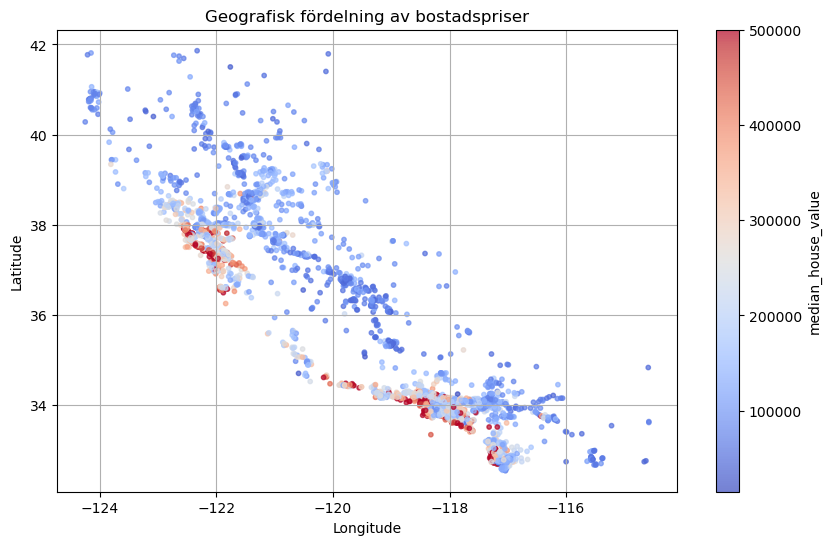

In [28]:
plot_housing_price_map(df, "median_house_value", cmap="coolwarm")

In [ ]:
Testar att visulisera det med Geopandas och Contextily

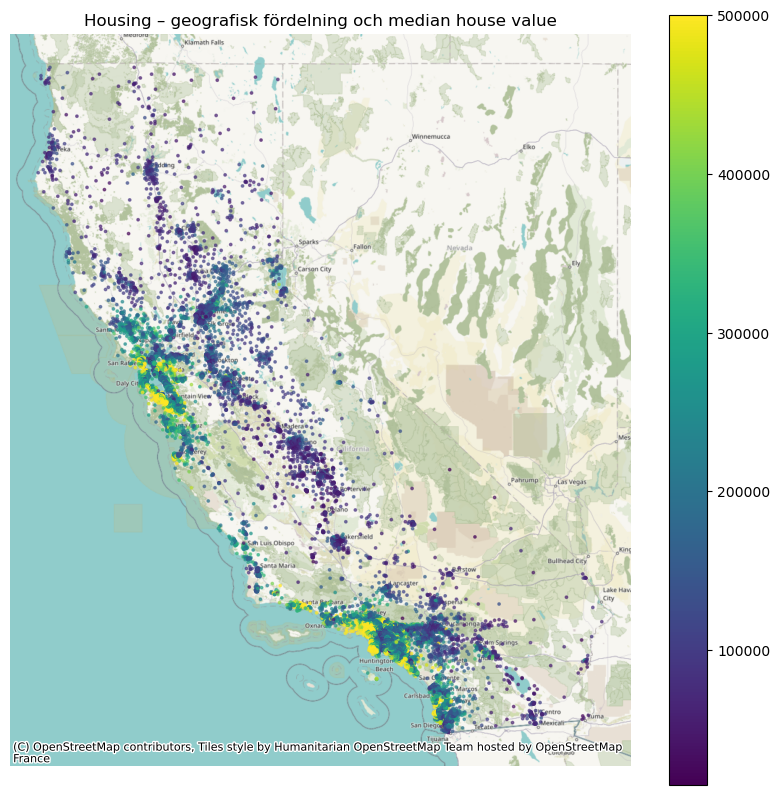

In [ ]:
# Testar att visulisera det med Geopandas och Contextily

#Geopandas
import geopandas as gpd

#contextily för bakgrundskarta
import contextily as ctx

import matplotlib.pyplot as plt

# Konverterar till Web Mercator som annvänds till contextily bakgrundskartor
gdf_web = gdf.to_crs(epsg=3857)

# Skapar en figur och axel
fig, ax = plt.subplots(figsize=(10, 10))

# Plottar husen som punkter och färgar efter medianhusvärde
gdf_web.plot(
    ax=ax,                         # Ritar i samma axel som bakgrundskartan
    column="median_house_value",   # Färgar punkter efter pris
    legend=True,                   # Visar legend
    markersize=3,                  # Punktstorlek
    alpha=0.6                      # Transparens
)

# Lägger på bakgrundskarta
ctx.add_basemap(ax)

# Sätter en titel
ax.set_title("Housing – geografisk fördelning och median house value")

# Tar bort axel-ticks vilket ger snyggare karta
ax.set_axis_off()

plt.show()

Resultat från steg 3 -  Statistiken visar stora skillnader i median_house_value mellan olika områden. Medelvärdet är högre än medianen, vilket indikerar en sned fördelning med ett fåtal mycket dyra områden.

Steg 4 - Fördelningar samt visualiseringar för att obervera skillnader etc

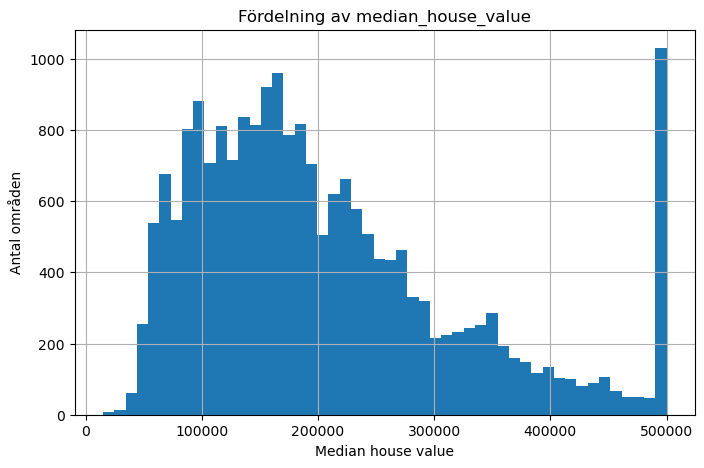

In [29]:
#Fördelningen är tydligt sned
# Många observationer i lägre prisnivåer
# Ett tydligt “stopp” vid 500001 (pris-taket)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["median_house_value"], bins=50)
plt.title("Fördelning av median_house_value")
plt.xlabel("Median house value")
plt.ylabel("Antal områden")
plt.grid(True)
plt.show()

#
#

Resultat av steg 4 - Histogrammet visar att bostadspriserna är snedfördelade och att ett tydligt pristak finns vid 500001, vilket indikerar att högre värden har kapats i datasetet.
Histogrammet visar att bostadspriserna är snedfördelade och att ett pristak finns vid 500001. Detta indikerar att högre värden har kapats

Steg 5 - Transformera den data som är sne

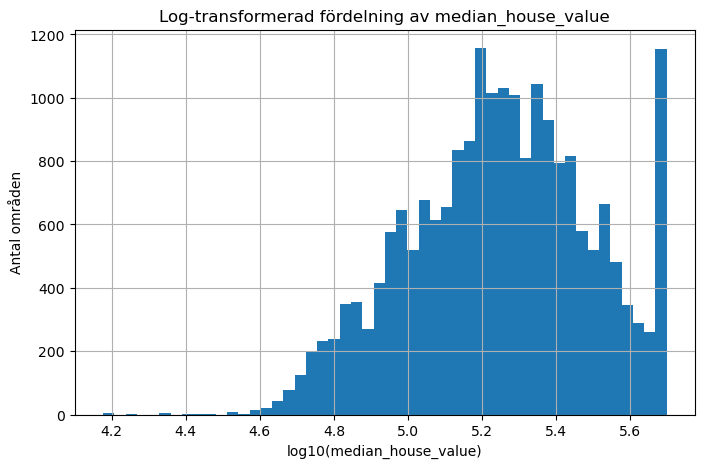

In [30]:
import numpy as np

plt.figure(figsize=(8, 5))
plt.hist(np.log10(df["median_house_value"]), bins=50)
plt.title("Log-transformerad fördelning av median_house_value")
plt.xlabel("log10(median_house_value)")
plt.ylabel("Antal områden")
plt.grid(True)
plt.show()

Steg 6 Samband: pris vs inkomst

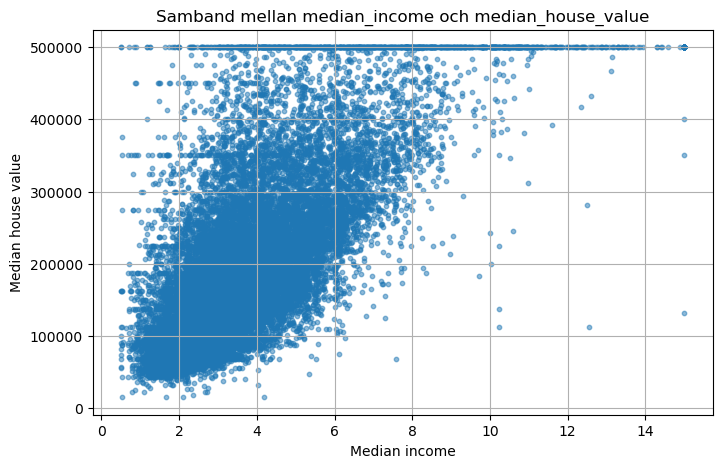

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df["median_income"],
    df["median_house_value"],
    s=10,
    alpha=0.5
)
plt.title("Samband mellan median_income och median_house_value")
plt.xlabel("Median income")
plt.ylabel("Median house value")
plt.grid(True)
plt.show()

Resultat steg 6 - Visualiseringen visar ett tydligt samband mellan median_income och median_house_value. Områden med högre medianinkomst tenderar att ha högre bostadspriser, vilket tyder på ett starkt socioekonomiskt samband

Steg 7 - Prisfördelning per kategori (ocean_proximity)

<Figure size 1000x500 with 0 Axes>

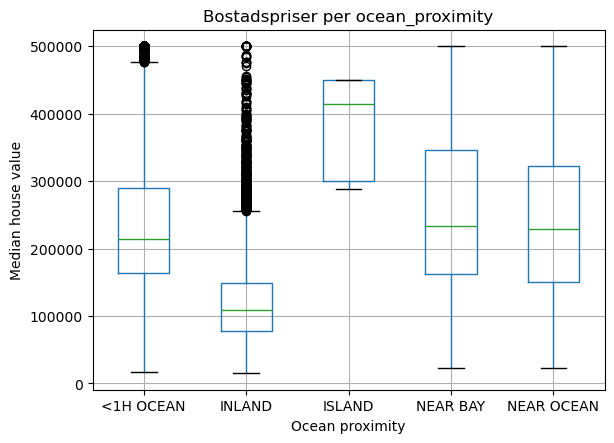

In [32]:
plt.figure(figsize=(10, 5))
df.boxplot(
    column="median_house_value",
    by="ocean_proximity",
    grid=True
)
plt.title("Bostadspriser per ocean_proximity")
plt.suptitle("")  # tar bort automatisk undertitel
plt.xlabel("Ocean proximity")
plt.ylabel("Median house value")
plt.show()

Resultat steg 7 - Kustnära områden har högre medianpriser. Inland har lägre och mer samlade priser. Outliers syns tydlig. 


Steg 8 - Sammanfattning och slutsats från min EDA

Den utforskande dataanalysen har genomförts på ett dataset som representerar aggregerad bostadsinformation på områdesnivå i Kalifornien. Varje rad motsvarar ett geografiskt område (census block group) och innehåller medianvärden och totaler för bostadsrelaterade variabler.

Analysen visar att bostadspriserna (median_house_value) är tydligt snedfördelade, med ett  pristak vid 500001. Detta indikerar att de dyraste områdena inte fullt ut kan särskiljas i datan, vilket är en viktig begränsning att beakta vid tolkning av resultaten.

Ett starkt positivt samband identifierades mellan median_income och median_house_value, vilket tyder på att socioekonomiska faktorer har stor påverkan på bostadspriserna. Visualiseringar av geografiska koordinater visar dessutom att kustnära områden generellt uppvisar högre prisnivåer än inlandet.

Sammanfattningsvis är bostadsområden belägna nära havet eller större bukter generellt dyrare än inlandområden. De viktigaste faktorerna som påverkar prisnivåerna tycks vara geografiskt läge samt medianinkomst i området. Inlandområden kännetecknas av lägre priser och mindre variation, medan kustnära områden uppvisar både högre priser och större spridning

Eftersom datasetet är aggregerat på områdesnivå och innehåller kapade värden för bostadspris kan analysen inte användas för att dra slutsatser om enskilda bostäder. Resultaten bör därför tolkas som övergripande mönster snarare än exakta prisrelationer

Har något varit utmanande i kursen/kunskapskontrollerna? Vad har du lärt dig?

Jag har uppskattat kursen mycket och tycker det har varit roligt att lära mig något nytt. Jag är inte programmerare i grunden, vilket har gjort att själva kodandet stundtals varit utmanande, men samtidigt väldigt lärorikt. Att arbeta praktiskt med Python och skriva kod själv har gett mig en bättre förståelse för hur dataanalys fungerar i praktiken.

Många av kommentarerna i koden har jag skrivit främst för min egen förståelse och som stöd i inlärningen. I framtiden skulle jag kunna bli bättre på att anpassa kommentarerna mer till andra läsare och göra dem mer övergripande och pedagogiska.

⸻

2. Vilket betyg anser du att du ska ha och varför?

Jag upplever att jag har presterat bra utifrån mina förutsättningar och den tid jag haft tillgänglig vid sidan av arbete och familjeliv. Jag har lagt ned mycket tid på att förstå datan, resonera kring resultaten och dokumentera analysen på ett tydligt sätt. Samtidigt är jag medveten om att det är läraren som sätter betyget och jag överlåter den bedömningen till dig.

⸻

3. Något du vill lyfta fram till Terese?

Jag vill lyfta att jag tycker undervisningen på fredagar har varit väldigt bra och pedagogisk. Samtidigt hade jag gärna sett fler undervisningstillfällen, då kursen innehåller mycket nytt stoff och praktiskt arbete. En lektion i veckan känns något snålt med tanke på kursens innehåll och ambitionsnivå.

Avslutningsvis vill jag säga att jag verkligen har uppskattat kursen och att den har väckt ett fortsatt intresse för programmering och dataanalys. Ser fram emot fortsättningen nästa år :-)

//Jonas Falkowski Källman